Creating a consolidated dataset of reddit posts. These reddit posts are classified either depressed or not depressed. ~30,000 samples of both classes.

In [ ]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv('/content/303_TRANSCRIPT.csv',sep = '\t')

In [ ]:
df.head()

,start_time,stop_time,speaker,value
0,26.276,48.696,Ellie,hi i'm ellie thanks for coming in today i was ...
1,49.256,50.406,Ellie,how are you doing today
2,50.686,51.836,Participant,okay how 'bout yourself
3,52.576,54.136,Ellie,i'm great thanks
4,54.816,56.236,Ellie,where are you from originally


In [ ]:
df_train = pd.read_csv('/content/train_split_Depression_AVEC2017.csv')

In [ ]:
df_train.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303,0,0,0,0,0,0.0,0,0,0,0,0
1,304,0,6,0,0,1,1.0,2,2,0,0,0
2,305,0,7,1,0,1,1.0,2,2,1,0,0
3,310,0,4,1,1,1,0.0,0,0,1,1,0
4,312,0,2,1,0,0,1.0,1,0,0,0,0


In [ ]:
df_train['PHQ8_Binary'].value_counts()

,count
PHQ8_Binary,
0,77
1,30


In [ ]:
preset_speaker = "Participant"
filtered_rows = df[df['speaker'] == preset_speaker]
concatenated_text = ' '.join(filtered_rows['value'].astype(str))
print(concatenated_text)


okay how 'bout yourself here in california yeah oh well that it's big and broad there's a lot to do a lot of um um job opportunities than other states um pretty much that it's big and there's a lot you can do here traffic um maybe the violence rate bad news even though you know you wanna know what's going on in your environment but you still have to watch it so you can you know look out to see what's going on on a daily basis sociology i have a um two year degree in liberal arts but my major was sociology no i'm actually an m_t_a bus operator well since metro is steady growing um my dream job is to move up in the company and i'm about to actually start some classes for supervisory next week so um 'cause they look to promote within the company so that's the good thing there's a lot of opportunities at metro where you can take classes and they'll pay for your tuition and things of that nature thanks well it's not actually hard as right now it's easy if you take advantage of it right now 

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords once
nltk.download('stopwords')

# Define stopwords and filler words
filler_words = ['uh', 'um', 'you know', 'like', 'I mean', 'uhh', 'hmm', 'pardon me','excuse me','ah','oh','kind of','sort of','well','basically','actually','so','so yeah','to be honest','to tell you the truth','if you know what I mean',"as I was saying","I don't know","probably"] # Add more as needed
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove anything between < and >, including the brackets
    text = re.sub(r'<.*?>', '', text)

    # Remove filler words
    filler_pattern = r'\b(?:' + '|'.join(filler_words) + r')\b'
    text = re.sub(filler_pattern, '', text)

    # Remove special characters and extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove common stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join words back to a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Sample input text (long conversation)
input_text = concatenated_text

# Preprocess the text
cleaned_text = preprocess_text(input_text)

# Output the cleaned text
print("Cleaned Text:\n", cleaned_text)


Cleaned Text:
 okay bout california yeah big broad theres lot lot job opportunities states pretty much big theres lot traffic maybe violence rate bad news even though wanna know whats going environment still watch look see whats going daily basis sociology two year degree liberal arts major sociology im mta bus operator since metro steady growing dream job move company im start classes supervisory next week cause look promote within company thats good thing theres lot opportunities metro take classes theyll pay tuition things nature thanks hard right easy take advantage right cause look promote within since im already working thats good thing good go ahead take classes need youre interested go ahead move ladder soon possible mean im sorry okay read take long walk hot bath meditate close eyes sometimes im pretty much good see bus operator run circumstances situations gotta remain calm still remain professional time look goes mean comes experience something continuous basis usually somew

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(cleaned_text.split())

856

In [ ]:
df_ = pd.read_csv('/content/305_TRANSCRIPT.csv',sep = '\t')
df_.head()

,start_time,stop_time,speaker,value
0,28.655,40.645,Ellie,hi i'm ellie thanks for coming in today i was ...
1,41.355,50.955,Ellie,i'm here to learn about people and would love ...
2,51.625,52.785,Ellie,how are you doing today
3,53.245,54.445,Participant,i'm doing alright
4,55.045,55.835,Ellie,that's good


In [ ]:
preset_speaker = "Participant"
filtered_rows = df_[df_['speaker'] == preset_speaker]
concatenated_text_2 = ' '.join(filtered_rows['value'].astype(str))
print(concatenated_text_2)

i'm doing alright uh originally i'm from california uh born in glendale i'm not too happy with it uh just unemployed at the moment but uh actively seeking uh uh doing what i'm supposed to be doing uh there are some uh  some prospects there but hopefully i'll learn something today yeah well i have one it's a girlfriend so i consider her a roommate a lover type thing pardon me um we're pretty close uh i met her last year and uh we've been through some troubling times but uh we're starting to see a light at the end of the tunnel uh the troubling times uh i would let me see uh well i had uh gotten a d_u_i last year and uh lost my job i'm a truck driver by trade so  uh that kinda threw me way off uh having a fourteen hundred dollar a week job uh and then going to nothing kinda like plus losing my my license kinda really threw me off and uh I couldn't um i haven't really uh found anything that i was interested in uh so i started cooking and our trying to see which other route i can go as far

In [ ]:
import re
import nltk
from nltk.corpus import stopwords


# Define stopwords and filler words
filler_words = ['uh', 'um', 'you know', 'like', 'I mean', 'uhh', 'hmm', 'pardon me','excuse me','ah','oh','kind of','sort of','well','basically','actually','so','so yeah','to be honest','to tell you the truth','if you know what I mean',"as I was saying","I don't know","probably"]


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    filler_pattern = r'\b(?:' + '|'.join(filler_words) + r')\b'
    text = re.sub(filler_pattern, '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    cleaned_text = ' '.join(words)
    return cleaned_text

# Sample input text (long conversation)
input_text = concatenated_text_2
# Preprocess the text
cleaned_text_2 = preprocess_text(input_text)

# Output the cleaned text
print("Cleaned Text:\n", cleaned_text_2)


Cleaned Text:
 im doing alright originally im from california born in glendale im not too happy with it just unemployed at the moment but actively seeking doing what im supposed to be doing there are some some prospects there but hopefully ill learn something today yeah i have one its a girlfriend i consider her a roommate a lover type thing were pretty close i met her last year and weve been through some troubling times but were starting to see a light at the end of the tunnel the troubling times i would let me see i had gotten a dui last year and lost my job im a truck driver by trade that kinda threw me way off having a fourteen hundred dollar a week job and then going to nothing kinda plus losing my my license kinda really threw me off and i couldnt i havent really found anything that i was interested in i started cooking and our trying to see which other route i can go as far as having some a career and im choose choosing to go into the culinary field but meanwhile i still have to

In [ ]:
len(cleaned_text.split())

2714

In [ ]:
id = [303,305]
text = [cleaned_text,cleaned_text_2]
label = [0,0]
data = {
    'id': id,
    'cleaned_text': text,
    'label': label
}
df_test = pd.DataFrame(data)


In [ ]:
df_test


,id,cleaned_text,label
0,303,okay bout california yeah big broad theres lot...,0
1,305,im doing alright originally im from california...,0


In [ ]:
len(text)

137

In [ ]:
from transformers import LongformerModel, LongformerTokenizer
import torch
import numpy as np

model_name = "allenai/longformer-base-4096"
model = LongformerModel.from_pretrained(model_name, output_attentions=True, output_hidden_states=True)
tokenizer = LongformerTokenizer.from_pretrained(model_name)

text = "The Longformer model is designed for handling long documents efficiently."
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding="max_length", max_length=50)

global_attention_mask = torch.zeros_like(inputs['input_ids'])
global_attention_mask[:, 0] = 1  # Set the first token to have global attention
outputs = model(**inputs, global_attention_mask=global_attention_mask)
hidden_states = outputs.hidden_states  # Hidden states for each layer
attention_scores = outputs.attentions  # Attention scores for each layer
avg_attention_scores = np.mean([att.detach().numpy() for att in attention_scores], axis=(0, 1))
token_attention = avg_attention_scores[0]  # Shape: (sequence_length, sequence_length)
cls_attention_weights = token_attention[0, :]  # Shape: (sequence_length,)
last_hidden_states = hidden_states[-1]
word_embeddings = last_hidden_states[0]  # Shape: (sequence_length, hidden_size
x = torch.from_numpy(cls_attention_weights[:, None])
print(x.shape)
print(word_embeddings.shape)
sentence_representation = torch.sum( x* word_embeddings, dim=0)

print("Sentence Representation Shape:", sentence_representation.shape)
print("Sentence Representation:", sentence_representation)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


torch.Size([514, 1])
torch.Size([50, 768])


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
from transformers import LongformerTokenizer, LongformerForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset from the CSV file
# Replace with the path to your dataset
dataset = pd.read_csv('/content/final_dataset.csv')
class_0 = dataset[dataset["class_value"] == 0]
class_1 = dataset[dataset["class_value"] == 1]

# Downsample class 0
class_0_downsampled = class_0.sample(n=74, random_state=42)

# Concatenate
balanced_data = pd.concat([class_0_downsampled, class_1], axis=0)
balanced_data = balanced_data.rename(columns={"class_value": "label", "concatenated_text": "text"})

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
print("\nBalanced class distribution:")
print(balanced_data["label"].value_counts())

# Split the dataset into training and validation datasets
# Adjust this according to your dataset
train_size = int(0.8 * len(balanced_data))  # 80% for training
val_size = len(balanced_data) - train_size  # 20% for validation
train_dataset = balanced_data[:train_size]
val_dataset = balanced_data[train_size:]

# Load the Longformer tokenizer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# Tokenize the text data
def tokenize_function(examples):
    return tokenizer(examples['concatenated_text'], truncation=True, padding='max_length', max_length=2048)

# Convert the train and validation data into datasets compatible with Trainer
def prepare_dataset(data):
    tokenized_inputs = data.apply(tokenize_function, axis=1)
    input_ids = [x['input_ids'] for x in tokenized_inputs]
    attention_mask = [x['attention_mask'] for x in tokenized_inputs]
    labels = data['class_value'].tolist()

    return Dataset.from_dict({
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels
    })

train_dataset = prepare_dataset(train_dataset)
val_dataset = prepare_dataset(val_dataset)

# Combine the datasets into a DatasetDict
dataset_dict = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset
})

# Initialize the Longformer model for sequence classification
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=2)
model.gradient_checkpointing_enable()  # Enable gradient checkpointing to save memory

# Define the training arguments (batch size of 1 to avoid OOM)
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",
    num_train_epochs=5,
    per_device_train_batch_size=1,  # Use batch size of 1 to avoid OOM
    gradient_accumulation_steps=8,  # Accumulate gradients to simulate a larger batch size
    fp16=True,  # Enable mixed precision to reduce memory usage
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=False,
    report_to="none",  # Disable wandb logging
)

# Define evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1).numpy()
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

# Define the Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_dict['train'],  # Pass the properly formatted training dataset
    eval_dataset=dataset_dict['validation'],  # Pass the validation dataset
    compute_metrics=compute_metrics,  # Include the evaluation metrics
)

# Free up any GPU memory before starting training
torch.cuda.empty_cache()

# Start the fine-tuning process
trainer.train()

# Save the fine-tuned model
model.save_pretrained('./fine_tuned_longformer')
tokenizer.save_pretrained('./fine_tuned_longformer')



Balanced class distribution:
label
1    74
0    74
Name: count, dtype: int64


KeyError: 'concatenated_text'

In [ ]:
import torch
from transformers import LongformerTokenizer, LongformerForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

# Load the dataset from the CSV file
# Replace with the path to your dataset
dataset = pd.read_csv('/content/final_processed_transcripts.csv')

# Load the Longformer tokenizer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# Tokenize the text data
def tokenize_function(examples):
    return tokenizer(examples, truncation=True, padding='max_length', max_length=2048)

# Apply tokenization to the 'processed_text' column
tokenized_inputs = dataset['processed_text'].apply(tokenize_function)

# Convert the tokenized inputs and labels into a format compatible with Trainer
# Dataset expects input_ids, attention_mask, and labels
input_ids = torch.tensor([x['input_ids'] for x in tokenized_inputs])
attention_mask = torch.tensor([x['attention_mask'] for x in tokenized_inputs])
labels = torch.tensor(dataset['class_value'].values)

# Create a Dataset object compatible with the Trainer
train_dataset = Dataset.from_dict({
    'input_ids': input_ids,
    'attention_mask': attention_mask,
    'labels': labels
})

# Initialize the Longformer model for sequence classification
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=2)
model.gradient_checkpointing_enable()  # Enable gradient checkpointing to save memory

# Define the training arguments (batch size of 1 to avoid OOM)
training_args = TrainingArguments(
    output_dir="./results",
    save_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=1,  # Use batch size of 1 to avoid OOM
    gradient_accumulation_steps=8,  # Accumulate gradients to simulate a larger batch size
    fp16=True,  # Enable mixed precision to reduce memory usage
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=False,
    report_to="none",  # Disable wandb logging
)

# Define the Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Pass the properly formatted dataset
)

# Free up any GPU memory before starting training
torch.cuda.empty_cache()

# Start the fine-tuning process
trainer.train()

# Save the fine-tuned model
model.save_pretrained('./fine_tuned_longformer')
tokenizer.save_pretrained('./fine_tuned_longformer')


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.G

Step,Training Loss
10,0.702500
20,0.662500
30,0.664600
40,0.645900
50,0.701100
60,0.652000


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


('./fine_tuned_longformer/tokenizer_config.json',
 './fine_tuned_longformer/special_tokens_map.json',
 './fine_tuned_longformer/vocab.json',
 './fine_tuned_longformer/merges.txt',
 './fine_tuned_longformer/added_tokens.json')

In [ ]:
import torch
from transformers import LongformerTokenizer, LongformerForSequenceClassification, Trainer, TrainingArguments
from torch.nn import CrossEntropyLoss
from datasets import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from the CSV file
# Replace with the path to your dataset
dataset = pd.read_csv('/content/final_dataset.csv')

# Split dataset into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load the Longformer tokenizer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['concatenated_text'], truncation=True, padding='max_length', max_length=2048)

# Apply tokenization
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format to PyTorch tensors
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'class_value'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'class_value'])

# Rename class_value to labels as expected by the model
train_dataset = train_dataset.rename_column("class_value", "labels")
test_dataset = test_dataset.rename_column("class_value", "labels")

# Calculate class weights based on the class distribution in the training data
class_counts = train_df['class_value'].value_counts().to_dict()
total_samples = len(train_df)
class_weights = {label: total_samples/count for label, count in class_counts.items()}
class_weights_tensor = torch.tensor([class_weights[0], class_weights[1]]).cuda()

# Initialize the Longformer model for sequence classification
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=2)
model.gradient_checkpointing_enable()  # Enable gradient checkpointing to save memory

# Custom loss function with class weights
loss_fn = CrossEntropyLoss(weight=class_weights_tensor)

# Custom Trainer class to compute weighted loss
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss = loss_fn(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Define training arguments with learning rate scheduling
training_args = TrainingArguments(
    output_dir="./results",
    save_strategy="epoch",
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    num_train_epochs=5,
    per_device_train_batch_size=1,  # Use batch size of 1 to avoid OOM
    gradient_accumulation_steps=8,  # Accumulate gradients to simulate larger batch size
    fp16=True,  # Enable mixed precision to reduce memory usage
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,  # Load the best model based on validation
    report_to="none",  # Disable wandb logging
    lr_scheduler_type="linear",  # Linear learning rate scheduling
    warmup_steps=500  # Number of warmup steps
)

# Define the custom Trainer object
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Train dataset
    eval_dataset=test_dataset,  # Validation dataset
)

# Free up any GPU memory before starting training
torch.cuda.empty_cache()

# Start the fine-tuning process
trainer.train()

# Save the fine-tuned model
model.save_pretrained('./fine_tuned_longformer')
tokenizer.save_pretrained('./fine_tuned_longformer')

# Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")


Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/38 [00:00<?, ? examples/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Initializing global attention on CLS token...


model.safetensors:   0%|          | 0.00/597M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss
0,0.687000,0.697623
1,0.687400,0.724433
2,0.643000,0.788727
4,0.602300,0.827833


Evaluation results: {'eval_loss': 0.6976227760314941, 'eval_runtime': 5.4136, 'eval_samples_per_second': 7.019, 'eval_steps_per_second': 0.924, 'epoch': 4.8}


In [ ]:
import torch
from transformers import LongformerTokenizer, LongformerForSequenceClassification, Trainer, TrainingArguments
from torch.nn import CrossEntropyLoss
from datasets import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset from the CSV file
# Replace with the path to your dataset
dataset = pd.read_csv('/content/final_dataset.csv')

# Split dataset into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load the Longformer tokenizer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['concatenated_text'], truncation=True, padding='max_length', max_length=2048)

# Apply tokenization
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format to PyTorch tensors
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'class_value'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'class_value'])

# Rename class_value to labels as expected by the model
train_dataset = train_dataset.rename_column("class_value", "labels")
test_dataset = test_dataset.rename_column("class_value", "labels")

# Calculate class weights based on the class distribution in the training data
class_counts = train_df['class_value'].value_counts().to_dict()
total_samples = len(train_df)
class_weights = {label: total_samples/count for label, count in class_counts.items()}
class_weights_tensor = torch.tensor([class_weights[0], class_weights[1]]).cuda()

# Initialize the Longformer model for sequence classification
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=2)
model.gradient_checkpointing_enable()  # Enable gradient checkpointing to save memory

# Custom loss function with class weights
loss_fn = CrossEntropyLoss(weight=class_weights_tensor)

# Custom Trainer class to compute weighted loss
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss = loss_fn(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Define evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1).numpy()
    labels = labels.numpy() if isinstance(labels, torch.Tensor) else labels
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

# Define training arguments with learning rate scheduling
training_args = TrainingArguments(
    output_dir="./results",
    save_strategy="epoch",
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    num_train_epochs=5,
    per_device_train_batch_size=1,  # Use batch size of 1 to avoid OOM
    gradient_accumulation_steps=8,  # Accumulate gradients to simulate larger batch size
    fp16=True,  # Enable mixed precision to reduce memory usage
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,  # Load the best model based on validation
    report_to="none",  # Disable wandb logging
    lr_scheduler_type="linear",  # Linear learning rate scheduling
    warmup_steps=500  # Number of warmup steps
)

# Define the custom Trainer object
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Train dataset
    eval_dataset=test_dataset,  # Validation dataset
    compute_metrics=compute_metrics,  # Evaluation metrics
)

# Free up any GPU memory before starting training
torch.cuda.empty_cache()

# Start the fine-tuning process
trainer.train()

# Save the fine-tuned model
model.save_pretrained('./fine_tuned_longformer')
tokenizer.save_pretrained('./fine_tuned_longformer')

# Evaluate the model on the test set
eval_results = trainer.evaluate(test_dataset)
print("Test Set Evaluation Results:")
for key, value in eval_results.items():
    print(f"{key}: {value:.4f}")


Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/38 [00:00<?, ? examples/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
0,0.690400,0.703083,0.368421,0.250000,0.100000,0.142857
1,0.697700,0.720880,0.473684,0.000000,0.000000,0.000000
2,0.654100,0.765761,0.473684,0.000000,0.000000,0.000000
4,0.624000,0.848619,0.473684,0.000000,0.000000,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

Test Set Evaluation Results:
eval_loss: 0.7031
eval_accuracy: 0.3684
eval_precision: 0.2500
eval_recall: 0.1000
eval_f1: 0.1429
eval_runtime: 5.2264
eval_samples_per_second: 7.2710
eval_steps_per_second: 0.9570
epoch: 4.8000


In [ ]:
test_df['concatenated_text'][183]

'Yes, I’m fine, thank you. I’m from San Fernando Valley, having moved from Detroit, Michigan, where I was born and raised. I relocated to LA in 2007, and unlike Detroit’s colder climate, I enjoy the warmer, more open environment here. Since my husband and I separated, I’ve found the cultural scene in LA, like museums and various activities, more aligned with my interests. I appreciate the outdoors and recall a memorable camping trip to Death Valley with friends during college. Professionally, I shifted from journalism to philosophy, intrigued by its diverse applications, and now I envision a career possibly involving child behavior studies. I manage my temperament well, often turning to music, TV, and walks to unwind. The biggest challenges I’ve faced include debating financial issues with my ex-husband and managing family dynamics, particularly during emotional discussions. A significant life decision was handling a friend’s serious illness, balancing advice with personal judgment. My

In [ ]:
import torch
from transformers import LongformerTokenizer, LongformerForSequenceClassification

# Load the fine-tuned Longformer model with safetensors format
model = LongformerForSequenceClassification.from_pretrained('/content/fine_tuned_model')

# Load the tokenizer
tokenizer = LongformerTokenizer.from_pretrained('/content/fine_tuned_model')

# Set model to evaluation mode
model.eval()

# Function to predict the class for a new text input
def predict(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding='max_length', max_length=2048)

    # Disable gradient calculations (important for evaluation mode)
    with torch.no_grad():
        # Get model outputs
        outputs = model(**inputs)
        logits = outputs.logits

        # Apply softmax to get probabilities
        probabilities = torch.softmax(logits, dim=-1).cpu().numpy()

        # Get predicted class (index of max probability)
        predicted_class = torch.argmax(logits, dim=-1).item()

    return predicted_class, probabilities

# Example usage: Test with new data
# new_text = "okay how bout yourself here in yeah that its big and broad theres a lot to do a lot of job opportunities than other states pretty much that its big and theres a lot you can do here traffic maybe the violence rate bad news even though you wanna know whats going on in your environment but you still have to watch it you can look out to see whats going on on a daily basis sociology i have a two year degree in liberal arts but my major was sociology no im an mta bus operator since metro is steady growing my dream job is to move up in the company and im about to start some classes for supervisory next week cause they look to promote within the company thats the good thing theres a lot of opportunities at metro where you can take classes and theyll pay for your tuition and things of that nature thanks its not hard as right now its easy if you take advantage of it right now cause they look to promote within since im already working there thats a good thing its good to go ahead and take the classes that you need that youre interested in and go ahead and move up the ladder as soon as possible what do you mean im sorry okay read take a long walk hot bath meditate just close my eyes sometimes im pretty much good because see by me being a bus operator you run into circumstances and situations you gotta remain calm and still remain professional at the same time i look at it it it goes with i mean it comes with experience you do something on a continuous basis usually you some somewhere down the line you become good at it i i look at it that ive been driving for years and dealing with the public its just how you handle circumstances you treat people you wanna be treated no im pretty good at it now maybe when i was younger you as you get older you get wiser you learn different things and im still learning today i would say my family my kids even though i had been having a lot of deaths around me but thats just go thats part of the life experience you born here but you gotta leave here one day but my kids will keep me sane and i love them and my family no setting good examples because youre the first teacher and you wanna set a positive good example for your kids and i think thats a good thing and it starts at home by you being the first teacher your kids youre youre their one that they see on a daily basis when they wake up whatevers been taught in the home they lookin and learning every day whether its a home school people kids have a tendency to do things what they see what i mean you try to keep it positive teach em good morals and values and how to get along with other people regardless of race and different things of that nature i have a four and a half year old son i have a seven year old daughter and i also have a twenty three year old yeah im bout to be my daughters pregnant with a boy she has three little girls i have three grandkids and one on the way which is a boy this time yeah the hardest thing is right now im a single parent that makes it hard alone itself and they can be expensive at times it depends on the persons situation the whether they have help or a job things of that nature to help the situation better but its hard but you i try to keep a job keep food in the house just maintain and support my kids the best way i can with my kids or just period whats memorable for me is that im the only one in my family with a degree its kinda yeah its kinda even though im the baby of ten kids and ive always kept that in the back of my mind even though everybody pretty much my whole family have decent job but im the only one with a degree i kinda gave myself a pat on the back i just thats the only thing i remember graduating and my family there and to support me happy that i accomplished something just even though it may not be much but it was better than just have having a high school diploma and i had i was working on my bachelors degree but i ended up in a bad car accident i never went back i got distracted and i was working at the same time but i was just moreso i needed income than than schooling at that time because i was a young parent cause i had my daughter at seventeen i was i needed the money to support her but i never went back but i feel its never too late i feel ill take some classes now that im with metro to help me move up the ladder thats why im starting a class next week hm the advice i wouldve gave myself that i wouldnt have been a young mother at a young age and that i wouldve stayed in school not let the accident just distract me and not i wouldve remained in school i wouldnt have had kids early rather i wouldve stayed in school and have a part time job or something just i just feel education is a excellent thing for a person just having knowledge and learning different things keeping your mind open to learning new ideas every day i think thats a plus in anybodys shoes just to better they selves through education maybe to maybe promote within your company or whatever the case may be that they help better your career im not quite sure you learn from your mistakes but at the same time you dont continue to make the same ones i feel its okay to make a mistake but long as you do something to change myself even though im going to school late but still im going i wanna better myself career wise yes my oldest daughter we had a argument because just the life that shes living right now and the things that shes going through and i had told her that she just needed to make some changes to better her situation and we got into an argument because how your kids sometimes dont wanna hear it hear the stuff that youre saying even though its true or or they just they just dont wanna hear it they may be going through something they dont wanna hear but we got into a argument about it but that just happened i just told her im not im sorry very close very close its just that the the situation my daughters in she just needs to make some changes to better her her life and ill be telling shes shes kinda stubborn in her own way i was raised to listen to your mom your moms not gonna tell you nothing wrong and ive been telling her over the years different things and its its kinda i was talking to a wall because she she did the opposite and now shes she regretting it cause shes my mom told me this mom im doing the opposite i guess she gotta bump her head a couple of times to get it its kinda i done told you i done left it alone and now its up to you to make the change its very frustrating because its im talking to a wall and shes not hearing me and im it seem its taking forever for her to change but its left up to the individual whenever theyre ready what i mean once the person get tired of something theyll make it change it may not be when you want it to happen but the ball is her court i only can do much wow i have my days since i have two little ones i kinda trained them to go to bed at eight o clock because they gotta go to school and i think its important to have a good nights rest because it kinda it it kinda gets you ready for the next day or how you gonna feel if you rested what type of person youll be that day cause everybody have they days whether theyre good or bad but thats just a part of life and i feel if you had a good nights good good nights rest hopefully youll have a good day pretty much i need my rest because im out there driving that bus and dealing with all these people and the job itself if very stressful i feel if im rested itll help me what am i irritated tired lazy feel i wanna lay down go to sleep get the rest that i need but i never thought about that i just cause i said everybody have their moments they do i never thought about that hm no no i dont really have a best friend but a person that i deal with and i used to work with she would tell you that im very outgoing a go getter dependable responsible im a people person i get along with others im kinda i leave a good a a good mark whether i know you or not if you was to you and i now i youd say she seems a nice young lady or whatever something that i try to stay happy id rather be happy than sad my kids keep me going what i mean especially when i go to pick them up from school or their being hey mom that just kinda make my day just them run up to me and be happy and excited what i mean youre more than you have a good day goodbye
# "
new_text = "I am feeling very down, I cant think straight. I am constantly stressed"
predicted_class, probabilities = predict(new_text)

print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")


Predicted Class: 0
Class Probabilities: [[0.5211971  0.47880286]]


In [ ]:
!pip install datasets imbalanced-learn

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv('/content/final_processed_transcripts.csv')
df.columns

Index(['number', 'class_value', 'processed_text'], dtype='object')

In [ ]:
df['class_value'].value_counts()

,count
class_value,
0,116
1,65


In [ ]:
df.head()

,number,class_value,processed_text
0,300,1,good my parents are from here i love it i the ...
1,301,1,k im doing good im from great i live in west t...
2,302,0,im fine how about yourself im from what part o...
3,303,0,okay how bout yourself here in yeah that its b...
4,304,0,im doing good from the cool weather the beache...


In [ ]:
df['processed_text'][1]

'k im doing good im from great i live in west the west side its alright i xxx no i live alone i love it im from here i grew up here its natural the weather the weather its always good its never its never bad theres always something to do its rarely a dull moment the traffic the traffic is horrible traffic is horrible in almost any major city but i hate the traffic not really i mean i have enough things going on here if i travel its usually somewhere thats within driving distance i studied business i did no ive ive been done for a few years i havent gone to school for a while one of these days ill go back to graduate school but my dream job would be to just work for myself and making lots of money i dont know i dont really have a dream job just something that i can i can work under my own terms and get paid decently and and be in a creative creative environment i dont know i think its just a matter of finding the right situation right now eh its been people are a little conservative abo

In [ ]:
import pandas as pd
import numpy as np
from transformers import LongformerTokenizer, LongformerForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from datasets import Dataset

# Load the dataset
dataset = pd.read_csv('/content/final_processed_transcripts.csv')

# Load the tokenizer and model
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=2)

# Tokenize the dataset
def tokenize_function(example):
    return tokenizer(example['processed_text'], truncation=True, padding='max_length', max_length=2048)

# Split dataset into train and validation sets
train_data, eval_data = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset['class_value'])

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_data)
eval_dataset = Dataset.from_pandas(eval_data)

# Tokenize the train and validation datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

# Convert the dataset into numpy arrays for oversampling
X_train = {'input_ids': np.array(train_dataset['input_ids']),
           'attention_mask': np.array(train_dataset['attention_mask'])}
y_train = np.array(train_dataset['class_value'])

# Concatenate input_ids and attention_mask to create a 2D array
X_train_combined = np.hstack([X_train['input_ids'], X_train['attention_mask']])

# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_combined, y_train)

# Split the resampled X back into input_ids and attention_mask
input_ids_resampled = X_resampled[:, :X_train['input_ids'].shape[1]]  # First part corresponds to input_ids
attention_mask_resampled = X_resampled[:, X_train['input_ids'].shape[1]:]  # Second part corresponds to attention_mask

# Convert resampled data back into Hugging Face Dataset format
# Rename 'class_value' to 'labels' for Trainer compatibility
resampled_train_dataset = Dataset.from_dict({
    'input_ids': list(input_ids_resampled),
    'attention_mask': list(attention_mask_resampled),
    'labels': y_resampled  # Use 'labels' instead of 'class_value'
})

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',             # Output directory
    evaluation_strategy="epoch",        # Evaluate every epoch
    num_train_epochs=5,                 # Number of training epochs
    per_device_train_batch_size=2,      # Adjust batch size for your GPU memory
    per_device_eval_batch_size=2,       # Batch size for evaluation
    warmup_steps=500,                   # Warmup steps for learning rate scheduler
    weight_decay=0.01,                  # Weight decay for regularization
    logging_dir='./logs',               # Logging directory
    logging_steps=10,                   # Log every 10 steps
    save_strategy="epoch",              # Save the model after every epoch
    load_best_model_at_end=True,        # Load the best model at the end based on evaluation
)

# Define the Trainer
trainer = Trainer(
    model=model,                        # The Longformer model
    args=training_args,                 # Training arguments
    train_dataset=resampled_train_dataset,  # Use the resampled dataset
    eval_dataset=eval_dataset,          # Separate evaluation dataset
    tokenizer=tokenizer,                # Tokenizer
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model and tokenizer
model.save_pretrained('./fine_tuned_longformer_new')
tokenizer.save_pretrained('./fine_tuned_longformer_new')

# Optional: Evaluate the model on the validation set
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/144 [00:00<?, ? examples/s]

Map:   0%|          | 0/37 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 170.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 63.06 MiB is free. Process 2589 has 14.68 GiB memory in use. Of the allocated memory 14.20 GiB is allocated by PyTorch, and 365.05 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
!pip install datasets imbalanced-learn

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from transformers import LongformerTokenizer, LongformerForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import nltk
from nltk.corpus import wordnet
import random

# Ensure the necessary NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

# Synonym replacement function
def synonym_replacement(text, n=2):
    words = text.split()
    new_words = words.copy()

    # Find words that have synonyms
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)  # Shuffle to replace random words

    # Limit the number of words to replace
    num_replacements = min(n, len(random_word_list))

    for random_word in random_word_list[:num_replacements]:
        synonyms = wordnet.synsets(random_word)
        synonym_words = [lemma.name() for lemma in synonyms[0].lemmas() if lemma.name() != random_word]
        if synonym_words:
            synonym = random.choice(synonym_words)
            new_words = [synonym if word == random_word else word for word in new_words]

    return ' '.join(new_words)

# Function to compute evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Calculate accuracy
    accuracy = accuracy_score(labels, predictions)

    # Calculate precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Function to augment the minority class using synonym replacement
def augment_minority_class(data, augmentation_func, num_augmented_samples=5):
    minority_class = data[data['labels'] == 1]  # Select minority class (Depressed)

    augmented_texts = []
    augmented_labels = []

    for index, row in minority_class.iterrows():
        for _ in range(num_augmented_samples):
            augmented_text = augmentation_func(row['processed_text'])
            augmented_texts.append(augmented_text)
            augmented_labels.append(1)  # Label for augmented text is the same (Depressed)

    augmented_data = pd.DataFrame({'processed_text': augmented_texts, 'labels': augmented_labels})

    # Combine original data with augmented data
    augmented_dataset = pd.concat([data, augmented_data])

    return augmented_dataset

# Load the dataset
dataset = pd.read_csv('/content/final_processed_transcripts.csv')

# Split dataset into train and validation sets
train_data, eval_data = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset['class_value'])

# Rename 'class_value' to 'labels' for compatibility
train_data = train_data.rename(columns={"class_value": "labels"})
eval_data = eval_data.rename(columns={"class_value": "labels"})

# Augment the minority class using synonym replacement
train_data_augmented = augment_minority_class(train_data, synonym_replacement, num_augmented_samples=2)

# Load the tokenizer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# Tokenize the text data (train and validation datasets)
def tokenize_function(examples):
    return tokenizer(examples['processed_text'], truncation=True, padding='max_length', max_length=2048)

# Tokenize train and validation data
train_tokenized = train_data_augmented.apply(lambda x: tokenize_function({'processed_text': x['processed_text']}), axis=1)
eval_tokenized = eval_data.apply(lambda x: tokenize_function({'processed_text': x['processed_text']}), axis=1)

# Extract input_ids and attention_mask for SMOTE
train_input_ids = np.array([token['input_ids'] for token in train_tokenized])
train_attention_mask = np.array([token['attention_mask'] for token in train_tokenized])
eval_input_ids = np.array([token['input_ids'] for token in eval_tokenized])
eval_attention_mask = np.array([token['attention_mask'] for token in eval_tokenized])

# Apply SMOTE to input_ids and labels
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_input_ids, train_data_augmented['labels'])

# Replicate attention_mask for resampled data (using the same mask as the original input)
resampled_attention_mask = np.tile(train_attention_mask[0], (X_resampled.shape[0], 1))  # Replicating the original attention mask

# Convert the resampled data back to DataFrame, including attention_mask
resampled_train_data = pd.DataFrame({
    'input_ids': list(X_resampled),
    'attention_mask': list(resampled_attention_mask),  # Use the replicated attention mask
    'labels': y_resampled
})

# Convert to Hugging Face Dataset format
resampled_train_dataset = Dataset.from_pandas(resampled_train_data)
eval_dataset = Dataset.from_pandas(pd.DataFrame({
    'input_ids': list(eval_input_ids),
    'attention_mask': list(eval_attention_mask),
    'labels': eval_data['labels']
}))

# Load the Longformer model
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=2)

# Define training arguments with early stopping and weight decay
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=10,  # Train for more epochs, but use early stopping
    per_device_train_batch_size=1,  # Batch size 1 due to memory limits
    gradient_accumulation_steps=16,  # Simulate larger batch size
    fp16=True,  # Mixed precision for memory efficiency
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    report_to="none",
    lr_scheduler_type="linear",
    learning_rate=1e-5,  # Lower learning rate
    warmup_steps=500,  # Warmup steps
    weight_decay=0.01,  # Add weight decay for regularization
    save_total_limit=2,  # Save only the 2 best models
)

# Trainer initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=resampled_train_dataset,  # SMOTE-resampled dataset
    eval_dataset=eval_dataset,              # Validation dataset
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model and tokenizer
model.save_pretrained('./fine_tuned_longformer_with_smote_early_stopping')
tokenizer.save_pretrained('./fine_tuned_longformer_with_smote_early_stopping')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
0,0.696800,0.715781,0.351351,0.351351,1.000000,0.520000
2,0.682900,0.712020,0.351351,0.351351,1.000000,0.520000
4,0.619000,0.720716,0.378378,0.361111,1.000000,0.530612
6,0.539600,0.757443,0.351351,0.351351,1.000000,0.520000
8,0.515100,0.789122,0.351351,0.351351,1.000000,0.520000
9,0.494600,0.814466,0.351351,0.351351,1.000000,0.520000


('./fine_tuned_longformer_with_smote_early_stopping/tokenizer_config.json',
 './fine_tuned_longformer_with_smote_early_stopping/special_tokens_map.json',
 './fine_tuned_longformer_with_smote_early_stopping/vocab.json',
 './fine_tuned_longformer_with_smote_early_stopping/merges.txt',
 './fine_tuned_longformer_with_smote_early_stopping/added_tokens.json')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/final_dataset.csv')
x = []
text = df['concatenated_text']
for t in text:
  x.append(len(t.split()))

In [ ]:
max(x)

1461

In [ ]:
min(x)

165

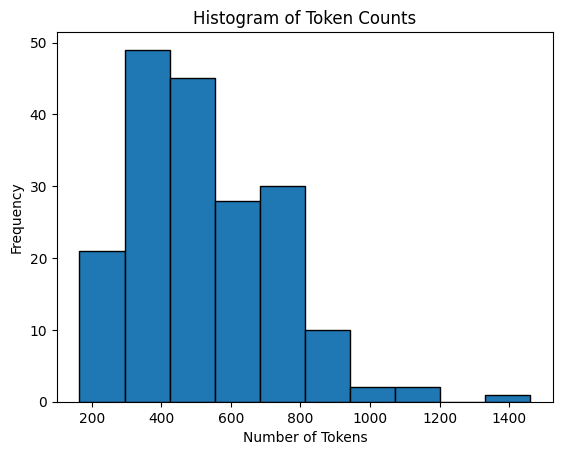

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Generate the histogram
plt.hist(x, bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Token Counts')

# Show the plot
plt.show()

In [ ]:
cnt = 0
for num in x:
  if num > 512:
    cnt += 1
print(cnt)

90


In [ ]:
from transformers import LongformerTokenizer, LongformerForSequenceClassification
from peft import get_peft_model, LoraConfig, TaskType
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.optim import AdamW
from transformers import get_scheduler
from tqdm import tqdm
import random

# Hyperparameters
MAX_LENGTH = 512
BATCH_SIZE = 16
EPOCHS = 3
LEARNING_RATE = 2e-5

# Load tokenizer and model
tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096")
model = LongformerForSequenceClassification.from_pretrained("allenai/longformer-base-4096", num_labels=2)

# Configure LoRA
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    r=8,  # Rank of the adaptation matrices
    lora_alpha=16,  # Scaling factor
    lora_dropout=0.1,
    target_modules=["query", "value"]  # Target specific layers in the transformer

)
model = get_peft_model(model, lora_config)
import pandas as pd

file_path = '/content/final_dataset.csv'  # Path to the uploaded file
data = pd.read_csv(file_path)
# Random undersampling to balance classes
def undersample(data, target_col, random_state=42):
    class_counts = data[target_col].value_counts()
    min_count = class_counts.min()

    balanced_data = data.groupby(target_col).apply(
        lambda x: x.sample(min_count, random_state=random_state)
    ).reset_index(drop=True)

    return balanced_data

data_balanced = undersample(data, "class_value")

# Dataset preparation
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoded = self.tokenizer(
            self.texts[idx],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            "input_ids": encoded["input_ids"].squeeze(0),
            "attention_mask": encoded["attention_mask"].squeeze(0),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Split dataset into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data_balanced["concatenated_text"], data_balanced["class_value"],
    test_size=0.2, stratify=data_balanced["class_value"], random_state=42
)

train_dataset = TextDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, MAX_LENGTH)
val_dataset = TextDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, MAX_LENGTH)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * EPOCHS)

# Loss function
criterion = nn.CrossEntropyLoss()

# Training loop
model.train()
for epoch in range(EPOCHS):
    loop = tqdm(train_loader, desc=f"Epoch {epoch + 1}")
    for batch in loop:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        loop.set_postfix(loss=loss.item())

# Validation
model.eval()
all_predictions, all_labels = [], []
total, correct = 0, 0
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=-1)

        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
f1 = f1_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-2-566c3c1ca433>:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data.groupby(target_col).apply(
Epoch 3: 100%|██████████| 8/8 [00:29<00:00,  3.72s/it, loss=0.668]


Validation Accuracy: 0.4667
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
